In [6]:
#Import Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the data
data = pd.read_csv("C:/Users/Acer/Desktop/Task_01//Data/train.csv")

In [12]:
# Handle missing data
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

In [14]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['MSZoning', 'SaleType', 'SaleCondition'], drop_first=True)

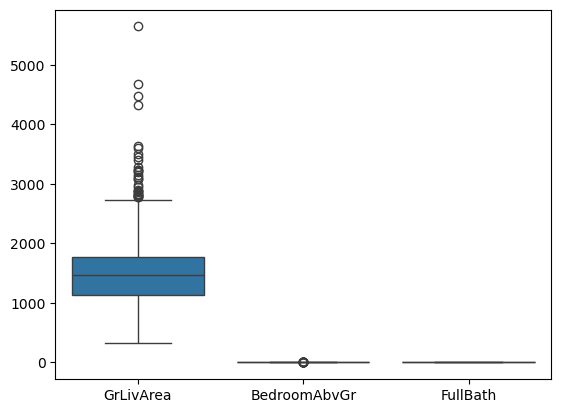

In [16]:
# Boxplot for each feature to check for outliers
sns.boxplot(data=data[['GrLivArea', 'BedroomAbvGr', 'FullBath']])
plt.show()

In [18]:
# Data Preprocessing: Select features and target variable
data = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]

# Optional: Log transform the SalePrice for better model fit
data['SalePrice'] = np.log1p(data['SalePrice'])

# Drop rows with missing values (if any)
data = data.dropna()

In [20]:
# Split the data into features (X) and target (y)
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Reverse the log transformation for predictions
y_pred_exp = np.expm1(y_pred)  # Exponentiate and subtract 1 to reverse the log transform

In [40]:


# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.07230616286376047
Root Mean Squared Error: 0.26889805291924385
Mean Absolute Error: 0.19793137271171019
R-squared: 0.6125299833066178


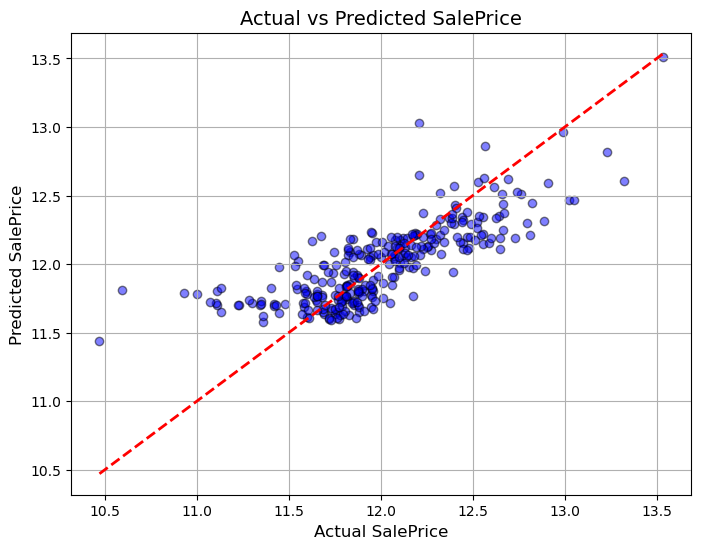

In [42]:
# Plot Actual vs Predicted SalePrice
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, edgecolors='k')  # Add color and transparency for better visualization

# Add a line showing perfect prediction (y = x) for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)

# Add labels and title
plt.xlabel('Actual SalePrice', fontsize=12)
plt.ylabel('Predicted SalePrice', fontsize=12)
plt.title('Actual vs Predicted SalePrice', fontsize=14)
plt.grid(True)  # Add grid lines for easier interpretation

# Show the plot
plt.show()


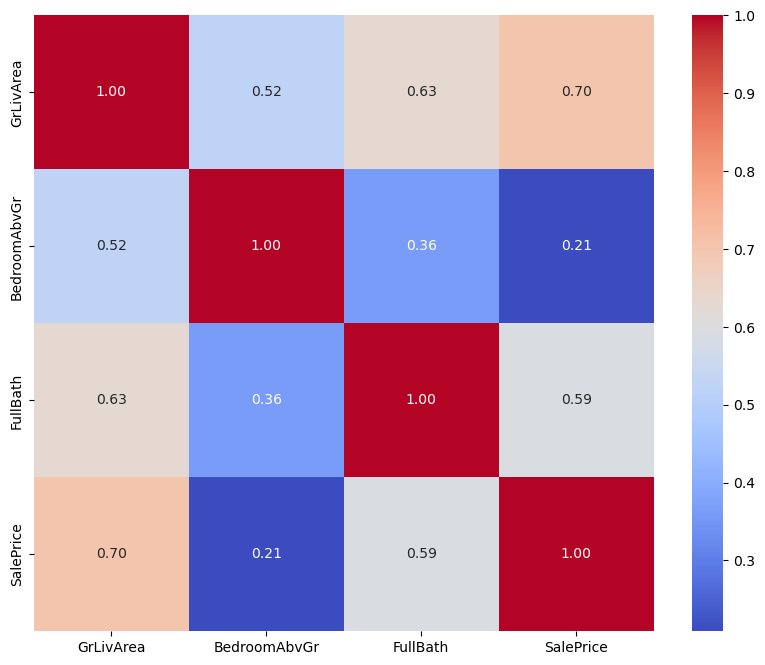

In [44]:
# Optional: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()